In [2]:
from julia.api import Julia
import os
os.environ["JULIA_NUM_THREADS"] = "4"
jl = Julia(compiled_modules=False)

In [11]:
print(jl.eval('Threads.nthreads()'))

4
Done!


In [6]:
jl.eval('include("plot_all.jl")')
Svd_time, LSQR_seq, LSQR_par = jl.eval('plot_all()')

print(Svd_time)
print(LSQR_seq)
print(LSQR_par)


[{'dim': (50, 50), 'time': 0.006391933}, {'dim': (60, 60), 'time': 0.008672813}, {'dim': (70, 70), 'time': 0.009616066}, {'dim': (80, 80), 'time': 0.010861851}, {'dim': (90, 90), 'time': 0.012807037}, {'dim': (100, 100), 'time': 0.015811455}]
[{'dim': (50, 50), 'time': 0.967744131}, {'dim': (60, 60), 'time': 1.343893429}, {'dim': (70, 70), 'time': 6.663374152}, {'dim': (80, 80), 'time': 13.703853562}, {'dim': (90, 90), 'time': 13.054079774}, {'dim': (100, 100), 'time': 16.660997321}]
[{'dim': (50, 50), 'time': 0.709001628}, {'dim': (60, 60), 'time': 0.773057841}, {'dim': (70, 70), 'time': 4.855108255}, {'dim': (80, 80), 'time': 9.874046615}, {'dim': (90, 90), 'time': 9.340839334}, {'dim': (100, 100), 'time': 11.13799038}]


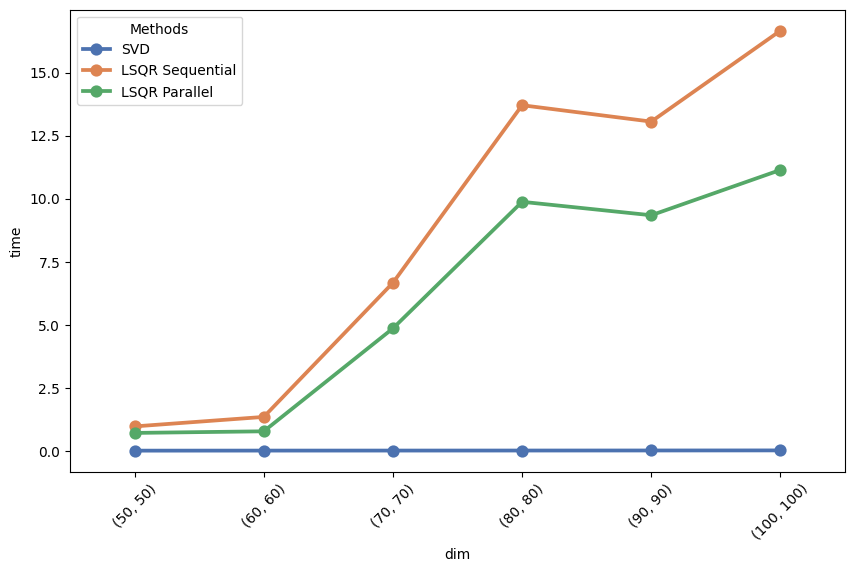

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# # Your data
# data1 = [{'dim': (90, 50), 'time': 0.007954164}, {'dim': (95, 55), 'time': 0.008038622}, {'dim': (100, 60), 'time': 0.008534033}, {'dim': (105, 65), 'time': 0.009281944}]
# data2 = [{'dim': (90, 50), 'time': 6.077339817}, {'dim': (95, 55), 'time': 9.769454199}, {'dim': (100, 60), 'time': 6.612801607}, {'dim': (105, 65), 'time': 6.926171987}]
# data3 = [{'dim': (90, 50), 'time': 4.013967412}, {'dim': (95, 55), 'time': 6.025712728}, {'dim': (100, 60), 'time': 3.897401388}, {'dim': (105, 65), 'time': 4.277641491}]

# Convert to DataFrames
df1 = pd.DataFrame(Svd_time)
df2 = pd.DataFrame(LSQR_seq)
df3 = pd.DataFrame(LSQR_par)

# Add a 'method' column to distinguish the data sources
df1['Methods'] = 'SVD'
df2['Methods'] = 'LSQR Sequential'
df3['Methods'] = 'LSQR Parallel'

# Concatenate the dataframes
df = pd.concat([df1, df2, df3])

# Convert 'dim' to string so it can be used as a categorical variable
df['dim'] = df['dim'].astype(str)

# Create the plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='dim', y='time', hue='Methods', palette='deep')
plt.xticks(rotation=45)
plt.show()

In [23]:
jl.eval('include("plot_all.jl")')
Svd_A, LSQR_A, LSQR_SVD = jl.eval('gap_k_var()')

print(Svd_A)
print(LSQR_A)
print(LSQR_SVD)

[{'k': 10, 'gap': 9.9852782905036}, {'k': 15, 'gap': 8.053887060004087}, {'k': 20, 'gap': 6.269848784508053}, {'k': 25, 'gap': 4.68921262552776}, {'k': 30, 'gap': 3.3702829751527115}, {'k': 35, 'gap': 2.1944295131064573}, {'k': 40, 'gap': 1.15433726198068}, {'k': 45, 'gap': 0.326506715569333}, {'k': 50, 'gap': 4.3324410041304694e-14}]
[{'k': 10, 'gap': 10.248641973515658}, {'k': 15, 'gap': 8.279117543189837}, {'k': 20, 'gap': 6.529589254550653}, {'k': 25, 'gap': 4.925223658868078}, {'k': 30, 'gap': 3.5128054679873055}, {'k': 35, 'gap': 2.322878227468996}, {'k': 40, 'gap': 1.3108811014258692}, {'k': 45, 'gap': 0.371590684394817}, {'k': 50, 'gap': 1.553717112832978e-13}]
[{'k': 10, 'gap': 5.4887130767653485}, {'k': 15, 'gap': 4.945173184015395}, {'k': 20, 'gap': 3.9415000455873925}, {'k': 25, 'gap': 3.014698303213932}, {'k': 30, 'gap': 1.9487028913624267}, {'k': 35, 'gap': 1.4735921011687512}, {'k': 40, 'gap': 1.0914250501928957}, {'k': 45, 'gap': 0.39336359263598614}, {'k': 50, 'gap': 1

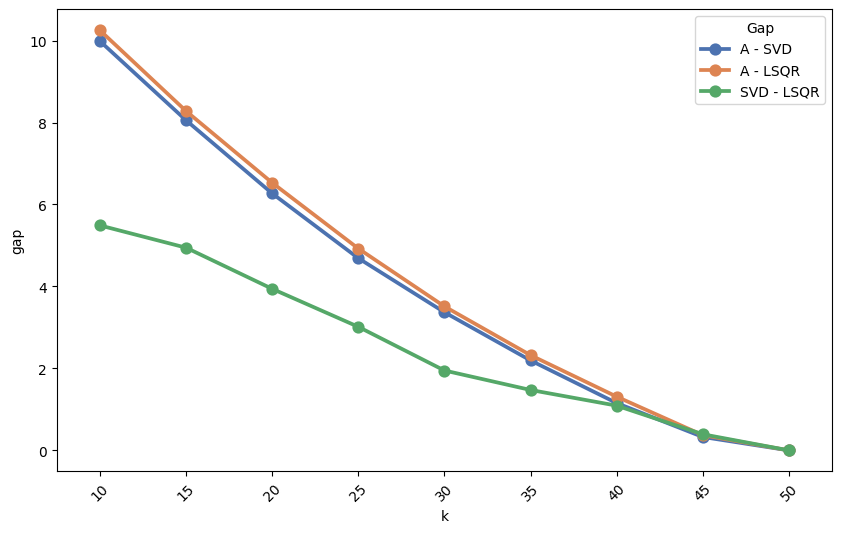

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert to DataFrames
df1 = pd.DataFrame(Svd_A)
df2 = pd.DataFrame(LSQR_A)
df3 = pd.DataFrame(LSQR_SVD)

# Add a 'method' column to distinguish the data sources
df1['Gap'] = 'A - SVD'
df2['Gap'] = 'A - LSQR'
df3['Gap'] = 'SVD - LSQR'

# Concatenate the dataframes
df = pd.concat([df1, df2, df3])

# Convert 'dim' to string so it can be used as a categorical variable
#df['dim'] = df['dim'].astype(str)

# Create the plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='k', y='gap', hue='Gap', palette='deep')
plt.xticks(rotation=45)
plt.show()